In [8]:
import cv2
import os
import time
import face_recognition
from  PIL import Image
import pandas as pd
import pickle
# In[99]:


import matplotlib.pyplot as plt


# In[100]:


from deepface import DeepFace

In [9]:
def capture():
    path = os.path.dirname(os.path.abspath(__file__))

    cam  = cv2.VideoCapture(0)

    while True:
       ret, frame = cam.read()
    
       if not ret:
          print('Fail to grab frame')
          break
       
       
       cv2.imshow('test',frame)   
    
       k = cv2.waitKey(1)
    
       os.chdir('F:\FACE\dataset')
       img_name = "himan.jpg"
       cv2.imwrite(img_name,frame)
    
    
       cam.release()
       cv2.destroyAllWindows()
       break

## Section2
    im = cv2.imread('F:\FACE\dataset\himan.jpg')

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier('F:\FACE\haarcascade_frontalface_default.xml')

    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
       cv2.rectangle(im, (x, y), (x+w, y+h), (0, 0, 255), 2)
       faces = im[y:y + h, x:x + w]
       cv2.imwrite('himan.jpg', faces)
    

    cv2.waitKey()
    cam.release()

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.25s/it]

{'region': {'x': 26, 'y': 9, 'w': 153, 'h': 195}, 'emotion': {'angry': 2.7220776743774877e-06, 'disgust': 5.553058004948547e-14, 'fear': 9.703099435043328e-09, 'happy': 99.82215762138367, 'sad': 1.4025237859982553e-06, 'surprise': 8.134404083648406e-05, 'neutral': 0.1777584315277636}, 'dominant_emotion': 'happy', 'age': 29, 'gender': 'Man', 'race': {'asian': 0.9655456058681011, 'indian': 76.51553750038147, 'black': 1.9066814333200455, 'white': 0.7053766399621964, 'middle eastern': 0.5401686299592257, 'latino hispanic': 19.366692006587982}, 'dominant_race': 'indian'}
['happy']


TypeError: cannot pickle 'module' object

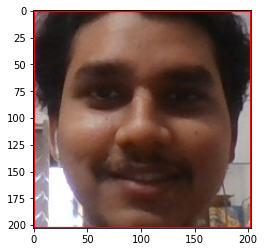

In [7]:
#capture()
img = cv2.imread('F:\FACE\dataset\himan.jpg')


plt.imshow(img)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)





p = DeepFace.analyze(img2)
print(p)
emotions = []
emotions.append(p['dominant_emotion'])


print(emotions)

pd.to_pickle(DeepFace,r'F:\FACE\face.pickle')
